In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile

from scipy.fftpack import fft, ifft, dct, idct

import pywt

%matplotlib inline

# Haar

In [2]:
def haar(x):
    out = []
    (ca, cd) = pywt.dwt(x,'haar')
    out = list(cd)+out
    while len(ca)!=1:
        (ca, cd) = pywt.dwt(ca,'haar')
        out = list(cd)+out
    out = list(ca)+out
    return out

def ihaar(x):
    N = len(x)
    i = 0
    x[:2] = pywt.idwt([x[0]], [x[1]],'haar')
    i = 2
    while 2*i<N+1:
        try:
            x[:2*i] = pywt.idwt(x[:i],x[i:2*i],'haar')
        except:
            print(i)
            return
        i = 2*i
    return x

# Modified

In [3]:
def X_DFT(x, L):
    N = len(x)
    X = fft(x).reshape(-1,1)
    return [0 if k in range(int(np.ceil((N+1-L)/2)), (N-1+L)//2+1) else X[k][0] for k in range(N)]

def X_DCT(x, L):
    N = len(x)
    X = dct(x)
    return [0 if k>=N-L else X[k] for k in range(N)]

def X_Haar(x, L):
    N = len(x)
    X = haar(x)
    return [0 if k>=N-L else X[k] for k in range(N)]

# Error

In [4]:
def error(x,xm):
    x=np.array(x)
    xm=np.array(xm)
    mse=np.mean((abs(x-xm))**2)
    return mse

In [5]:
def e_DFT(x,l):
    X = X_DFT(x, l)
    x_e = np.asarray(ifft(X))
    mse = np.mean(abs(x.reshape(-1,1) - x_e.reshape(-1,1))**2)
    return mse

def e_DCT(x,l):
    N = len(x)
    X = np.asarray(X_DCT(x, l))
    x_e = idct(X)/(2*N)
    mse = np.mean((x.reshape(-1,1) - x_e.reshape(-1,1))**2)
    return mse

def e_Haar(x,l):
    X = X_Haar(x, l)
    x_e = np.asarray(ihaar(X))
    mse = np.mean((x.reshape(-1,1) - x_e.reshape(-1,1))**2)
    return mse

# Error plot

In [18]:
def error_transform(l_range, x):
    #x = np.random.randint(x_max,size = N)
    er_dft = [e_DFT(x, l)for l in l_range]
    er_dft.reverse()
    er_dct = [e_DCT(x, l) for l in l_range]
    er_dct.reverse()
    er_haar = [e_Haar(x, l) for l in l_range]
    er_haar.reverse()
    plt.plot(l_range, er_dft, 'blue')
    plt.plot(l_range, er_dct, 'green')
    plt.plot(l_range, er_haar, 'brown')
    plt.legend(['DFT', 'DCT', 'Haar'])

In [7]:
fs, sound = wavfile.read('sound_1s.wav')

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [8]:
n = np.log2(len(sound))
if int(n) != n:
    N = int(n)
    new_sound = sound[:2**N]
sound = new_sound

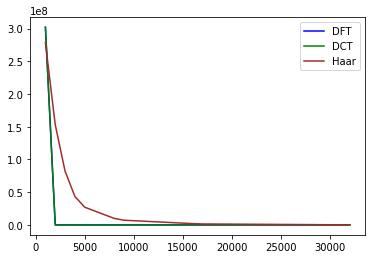

In [19]:
error_transform(range(1000,len(sound), 1000),sound)